# Model 2 - ChEBERTa embedding- linear regression - no interpretation



In [ ]:
# Import data leakage prevention utilities
import sys
import warnings
warnings.filterwarnings('ignore')

# Import custom utilities for data leakage prevention
from qsar_utils_no_leakage import (
    QSARDataProcessor,
    ScaffoldSplitter,
    plot_similarity_distribution,
    print_leakage_prevention_summary
)

print("✅ Data leakage prevention utilities loaded successfully!")
print("\n" + "="*70)
print_leakage_prevention_summary()

## 🛡️ Data Leakage Prevention - CRITICAL FIXES

**This notebook has been updated to prevent data leakage using:**

1. ✅ **Scaffold-based splitting** (not random!)
2. ✅ **Duplicate removal BEFORE splitting**
3. ✅ **Near-duplicate detection** (Tanimoto ≥ 0.95)
4. ✅ **Embeddings generated per split** (no leakage)
5. ✅ **Proper cross-validation** (scaffold-based)
6. ✅ **Similarity analysis** (train-test)
7. ✅ **Applicability domain** estimation

**Key Changes:**
- Scaffold-based splitting instead of random
- ChEBERTa embeddings generated AFTER splitting
- Complete verification of no SMILES overlap

---

In [ ]:
import multiprocessing

print("Number of CPU cores:", multiprocessing.cpu_count())

Number of CPU cores: 2


In [ ]:
# For Reporducibility
import numpy as np
np.random.seed(42)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/DrRoyRationalDesign/Input of triazole and cysteine_datasheet.xlsx')
df

,Identifier,Canonical SMILES,IC50 uM,PIC50
0,TB-VS0012,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=...,5.3,5.275724
1,TB-VS12-2,BrC1=CC(C2=NN=C(N2C)S)=CN=C1,200,3.698970
2,TB-VS12-3,BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1,200,3.698970
3,TB-VS12-4,CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1,22.57,4.646468
4,TB-VS12-5,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=CC=C3)N2C)=CN=C1,175,3.756962
...,...,...,...,...
185,ROY-0000225-001,CC(OC(N1CC(OCCCC2=CC=CC=C2)C1)=O)(C)C,148,3.829738
186,ROY-0000224-001,CCCCCCOC(C1)CN1C(OC(C)(C)C)=O,>200,NaN
187,ROY-0000177-001,BrC1=CC(C#CC2=CC=CC=C2)=CN=C1,>200,NaN
188,ROY-0000176-001,FC(F)(F)OC(C=C1)=CC=C1C#CC2=CN=CC(Br)=C2,>200,NaN


In [ ]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 35.6 MB/s eta 0:00:00


In [ ]:
# ✅ FIXED: Proper duplicate handling to prevent leakage
import pandas as pd
from rdkit import Chem

print(f"📊 Original dataset: {len(df)} rows")

# Initialize the QSAR data processor
processor = QSARDataProcessor(smiles_col='Canonical SMILES', target_col='IC50 uM')

# Step 1: Canonicalize SMILES (ensures consistency)
df = processor.canonicalize_smiles(df)

# Step 2: Remove exact duplicates BEFORE splitting (prevents leakage!)
# Strategy 'average' will average replicate measurements
df = processor.remove_duplicates(df, strategy='average')

print(f"\n✅ Clean dataset ready: {len(df)} unique molecules")

# Keep this for backward compatibility with existing code
unique_df = df.copy()
numeric_df = df.copy()

Duplicate molecules found:
     Identifier                                   Canonical SMILES IC50 uM  \
138   TB-LCA-33  ClC1=CC=C(CS(C[C@H](N)C(NC(C=C2)=CC=C2C3=CC=CC...     200   
147   TB-LCA-34  ClC1=CC=C(CS(C[C@H](N)C(NC(C=C2)=CC=C2C3=CC=CC...     200   
90   TB-VS12-97  O=C1NC(C=CN1[C@@H]2O[C@H](CSC3=NN=C(C4=CC(C#CC...   97.71   
94   TB-VS12-97  O=C1NC(C=CN1[C@@H]2O[C@H](CSC3=NN=C(C4=CC(C#CC...   97.71   

        PIC50  
138  3.698970  
147  3.698970  
90   4.010061  
94   4.010061  


In [ ]:
unique_df

,Identifier,Canonical SMILES,IC50 uM,PIC50
0,TB-VS0012,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=...,5.3,5.275724
1,TB-VS12-2,BrC1=CC(C2=NN=C(N2C)S)=CN=C1,200,3.698970
2,TB-VS12-3,BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1,200,3.698970
3,TB-VS12-4,CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1,22.57,4.646468
4,TB-VS12-5,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=CC=C3)N2C)=CN=C1,175,3.756962
...,...,...,...,...
185,ROY-0000225-001,CC(OC(N1CC(OCCCC2=CC=CC=C2)C1)=O)(C)C,148,3.829738
186,ROY-0000224-001,CCCCCCOC(C1)CN1C(OC(C)(C)C)=O,>200,NaN
187,ROY-0000177-001,BrC1=CC(C#CC2=CC=CC=C2)=CN=C1,>200,NaN
188,ROY-0000176-001,FC(F)(F)OC(C=C1)=CC=C1C#CC2=CN=CC(Br)=C2,>200,NaN


In [ ]:
unique_df['IC50 uM'].value_counts()

,count
IC50 uM,
200,35
>200,5
250,4
100,3
25.12,2
...,...
6.843,1
5.615,1
9.705,1


In [ ]:
unique_df['IC50 uM'].isna().sum()


np.int64(6)

In [ ]:
# Keep only rows where IC50 uM is numeric
mask = pd.to_numeric(df["IC50 uM"], errors="coerce").notna()
df = df[mask].reset_index(drop=True)

print(f"✅ Final clean dataset: {len(df)} molecules with valid IC50 values")

# Keep for backward compatibility
numeric_df = df.copy()

In [ ]:
numeric_df

,Identifier,Canonical SMILES,IC50 uM,PIC50
0,TB-VS0012,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=...,5.3,5.275724
1,TB-VS12-2,BrC1=CC(C2=NN=C(N2C)S)=CN=C1,200,3.698970
2,TB-VS12-3,BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1,200,3.698970
3,TB-VS12-4,CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1,22.57,4.646468
4,TB-VS12-5,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=CC=C3)N2C)=CN=C1,175,3.756962
...,...,...,...,...
181,ROY-0000175-001,CC(OC(N(C1)CC21CCN(C3=CC(C#CC4=CC=CC=C4)=CN=C3...,6.843,5.164753
183,ROY-0000223-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,5.615,5.250650
184,ROY-0000222-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,9.705,5.013004
185,ROY-0000225-001,CC(OC(N1CC(OCCCC2=CC=CC=C2)C1)=O)(C)C,148,3.829738


# Standarization

/tmp/ipython-input-1330070655.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[col] = numeric_df[col].astype(str).str.replace(">", "", regex=False)
/tmp/ipython-input-1330070655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[col] = numeric_df[col].astype(str).str.replace("<", "", regex=False)
/tmp/ipython-input-1330070655.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



UNIVARIATE ANALYSIS: IC50 UΜ


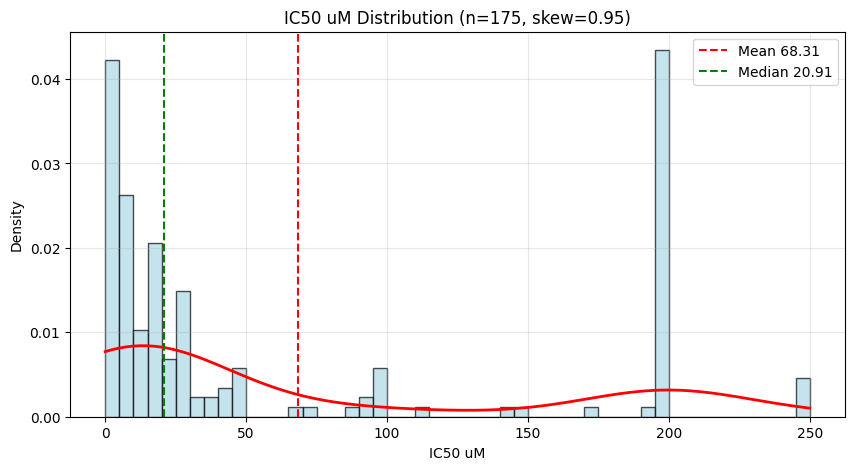

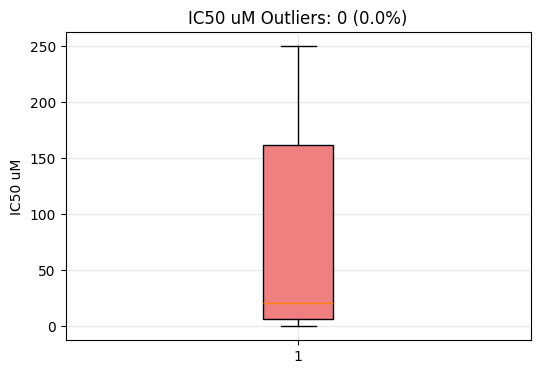


STATISTICAL SUMMARY
   Count    Mean  Median     Std    Min    Max    Range     Q1     Q3  \
0    175  68.306   20.91  82.996  0.048  250.0  249.952  6.373  161.5   

       IQR  Skewness  Kurtosis  Outliers  Outlier %  Normal p-value  \
0  155.128     0.947    -0.865         0        0.0             0.0   

   Likely Normal  
0          False  

INSIGHTS & RECOMMENDATIONS
- Moderately skewed — consider a transform.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Column name
col = "IC50 uM"

# =============================
# CLEAN + CONVERT TO NUMERIC
# =============================
# Remove ">" or "<" signs if present (common in IC50 datasets)
numeric_df[col] = numeric_df[col].astype(str).str.replace(">", "", regex=False)
numeric_df[col] = numeric_df[col].astype(str).str.replace("<", "", regex=False)

# Convert to numeric safely
numeric_df[col] = pd.to_numeric(numeric_df[col], errors='coerce')

# Drop NaNs
data = numeric_df[col].dropna()

print("UNIVARIATE ANALYSIS: IC50 UΜ")
print("="*60)

# =============================
# HISTOGRAM + KDE + MEAN/MEDIAN
# =============================
plt.figure(figsize=(10,5))

# Histogram
plt.hist(data, bins=50, density=True, alpha=0.7,
         color='lightblue', edgecolor='black')

# KDE (if enough data)
if len(data) > 10:
    try:
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), 200)
        plt.plot(x, kde(x), 'r-', linewidth=2)
    except:
        pass

plt.axvline(data.mean(), color='red', linestyle='--', label=f"Mean {data.mean():.2f}")
plt.axvline(data.median(), color='green', linestyle='--', label=f"Median {data.median():.2f}")

plt.title(f"{col} Distribution (n={len(data)}, skew={data.skew():.2f})")
plt.xlabel(col)
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# =============================
# BOX PLOT + OUTLIER ANALYSIS
# =============================
plt.figure(figsize=(6,4))
bp = plt.boxplot(data, patch_artist=True)
bp['boxes'][0].set_facecolor('lightcoral')

Q1, Q3 = data.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = data[(data < lower) | (data > upper)]
out_pct = len(outliers) * 100 / len(data)

plt.title(f"{col} Outliers: {len(outliers)} ({out_pct:.1f}%)")
plt.ylabel(col)
plt.grid(alpha=0.3)
plt.show()

# =============================
# STATISTICAL SUMMARY TABLE
# =============================
print("\nSTATISTICAL SUMMARY")
print("="*60)

row = {
    "Count": len(data),
    "Mean": data.mean(),
    "Median": data.median(),
    "Std": data.std(),
    "Min": data.min(),
    "Max": data.max(),
    "Range": data.max() - data.min(),
    "Q1": Q1,
    "Q3": Q3,
    "IQR": IQR,
    "Skewness": data.skew(),
    "Kurtosis": data.kurtosis(),
    "Outliers": len(outliers),
    "Outlier %": out_pct
}

# Normality test (if enough samples)
if len(data) >= 8:
    stat, p = stats.normaltest(data)
    row["Normal p-value"] = p
    row["Likely Normal"] = p > 0.05
else:
    row["Normal p-value"] = np.nan
    row["Likely Normal"] = "Insufficient data"

summary_df = pd.DataFrame([row])
print(summary_df.round(3))

# =============================
# INSIGHTS & RECOMMENDATIONS
# =============================
print("\nINSIGHTS & RECOMMENDATIONS")
print("="*60)

skew = row["Skewness"]
std = row["Std"]
rng = row["Range"]

recommendations = []

# Skewness
if abs(skew) > 2:
    recommendations.append("Highly skewed — consider log transform.")
elif abs(skew) > 0.5:
    recommendations.append("Moderately skewed — consider a transform.")

# Outlier presence
if out_pct > 10:
    recommendations.append("High outlier rate — consider robust models.")
elif out_pct > 5:
    recommendations.append("Moderate number of outliers — evaluate model impact.")

# Range vs Std
if std > 0 and rng > 100 * std:
    recommendations.append("Very wide dynamic range — consider scaling.")

if not recommendations:
    recommendations.append("Data appears well-behaved.")

for r in recommendations:
    print("-", r)


In [ ]:
!pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.4/552.4 kB 15.4 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn

In [ ]:
numeric_df['Canonical SMILES'].isna().sum()

np.int64(0)

In [ ]:
from rdkit import Chem

# Add a column to indicate validity
numeric_df['valid_smiles'] = numeric_df['Canonical SMILES'].apply(lambda s: Chem.MolFromSmiles(s) is not None)

# Print invalid SMILES
invalid_smiles = numeric_df.loc[~numeric_df['valid_smiles'], 'Canonical SMILES']
for idx, s in invalid_smiles.items():
    print(f"Row {idx}: {s}")



Row 68: ClC1=CC=C(CSC[C@H]([NH3]Cl)C(NC2=CC(C#CCCCCCC)=CN=C2)=O)C=C1
Row 69: ClC1=CC=C(CSC[C@H]([NH3]Cl)C(NC2=CC=C(F)C(F)=C2)=O)C=C1
Row 125: ClC1=CC=C(CSC[C@H]([NH3]Cl)C(NC(C=C2)=CC=C2C3=CC=CC=C3)=O)C=C1
Row 130: O=C(NC1=CC=C(C2=CC=CC=C2)C=C1)[C@@H]([NH3]Cl)CSCC3=CC([N+]([O-])=O)=CC([N+]([O-])=O)=C3
Row 132: O=C(NC1=CC=C(C2=CC=CC=C2)C=C1)[C@@H]([NH3]Cl)CSCC3=CC=C(C(F)(F)F)C=C3
Row 134: O=C(NC1=CC(C#CCCCCCC)=CN=C1)C(CC2=CC=C(Cl)C=C2)[NH3]Cl
Row 139: O=C(NC1=CC(C#CCCCCCC)=CN=C1)[C@@H]([NH3]Cl)CC2=CC=CC=C2
Row 141: ClC1=CC=C(CSC[C@@H]([NH3]Cl)C(NC(C=C2)=CC=C2C3=CC=CC=C3)=O)C=C1
Row 144: FC(C(F)=C1)=CC=C1NC([C@H](CSCC2=CC=C(C=C2)Cl)[NH3]Cl)=O
Row 145: O=C(N[C@H]1CCCCNC1=O)[C@@H]([NH3]Cl)CSCC2=CC=C(Cl)C=C2
Row 153: N[C@H](C(NC1=CC=C(OCCCCC2=CN(CCCNC3=CC=C([N]([O])=O)C4=NON=C34)N=N2)C=C1)=O)CSCC5=CC=C(Cl)C=C5


[04:14:25] Explicit valence for atom # 9 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 9 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 9 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 16 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 16 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 26 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 18 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 9 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 21 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 12 N, 5, is greater than permitted
[04:14:25] Explicit valence for atom # 24 N, 4, is greater than permitted
/tmp/ipython-input-2824881968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def fix_protonation_and_nitro(smiles: str) -> str:
    """Automatically fix common RDKit parsing issues for ammonium salts and nitro groups."""
    if not smiles:
        return smiles
    # Fix ammonium hydrochloride
    smiles = smiles.replace('[NH3]Cl', '[NH3+]Cl')
    smiles = smiles.replace('[NH3]Cl', '[NH3+]Cl')  # repeat in case multiple occurrences

    # Fix nitro groups
    smiles = smiles.replace('[N]([O])=O', '[N+](=O)[O-]')
    smiles = smiles.replace('[N]([O-])=O', '[N+](=O)[O-]')  # additional common form

    return smiles

def standardize_mol(mol, verbose=False):
    from rdkit.Chem.MolStandardize import rdMolStandardize

    clean_mol = rdMolStandardize.Cleanup(mol)
    if verbose:
        print('Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:')

    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    if verbose:
        print('Select the "parent" fragment:')

    uncharger = rdMolStandardize.Uncharger()
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    if verbose:
        print('Neutralize the molecule:')

    te = rdMolStandardize.TautomerEnumerator()
    taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    if verbose:
        print('Enumerate tautomers:')
    assert taut_uncharged_parent_clean_mol is not None

    if verbose:
        print(Chem.MolToSmiles(taut_uncharged_parent_clean_mol))
    return taut_uncharged_parent_clean_mol

def standardize_smiles(smiles, verbose=False):
    """Fix common parsing issues, then standardize molecule."""
    if verbose: print("Original:", smiles)

    fixed_smiles = fix_protonation_and_nitro(smiles)
    mol = Chem.MolFromSmiles(fixed_smiles)
    if mol is None:
        if verbose:
            print("Failed to parse even after automatic fixes:", fixed_smiles)
        return None

    std_mol = standardize_mol(mol, verbose=verbose)
    return Chem.MolToSmiles(std_mol)

def draw_mol_with_SVG(mol, molSize=(450,150)):
    """Draw RDKit molecule as SVG."""
    mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    display(SVG(svg.replace('svg:', '')))


In [ ]:
numeric_df['cleanedMol']=numeric_df['Canonical SMILES'].apply(standardize_smiles, verbose=True)
numeric_df

[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Running LargestFragmentChooser
[04:14:25] Running Uncharger
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Running LargestFragmentChooser
[04:14:25] Running Uncharger
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Norma

Original: CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1
Original: BrC1=CC(C2=NN=C(N2C)S)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1c(-c2cncc(Br)c2)n[nH]c1=S
Original: BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1c(SCc2ccc(Cl)cc2)nnc1-c1cncc(Br)c1
Original: CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2n[nH]c(=S)n2C)c1
Original: CCCCCCC#

[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Running LargestFragmentChooser
[04:14:25] Running Uncharger
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Running LargestFragmentChooser
[04:14:25] Running Uncharger
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Norma

CCCCCCC#Cc1cncc(-c2nnc(SCCCn3ccc(=O)[nH]c3=O)n2C)c1
Original: CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(O)C=C3)N2C)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(O)cc3)n2C)c1
Original: CCCCCCC#CC1=CC(C2=NN=C(SC[C@@H]3[C@H]4OC(C)(C)O[C@H]4[C@H](N5C(NC(C=C5)=O)=O)O3)N2C)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SC[C@H]3O[C@@H](n4ccc(=O)[nH]c4=O)[C@@H]4OC(C)(C)O[C@@H]43)n2C)c1
Original: ClC(C=C1)=CC=C1CSC2=NN=C(C3=CC=C(C#CCCCCCC)N=C3)N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1ccc(-c2nnc(SCc3ccc(Cl)cc3)n2C)cn1
Original: CN1C(C2=CN=CC(C#CCCCCCC)=C2)=NN=C1S(CC3=CC=C(Cl)C=C3)=O
Remove

[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Running LargestFragmentChooser
[04:14:25] Fragment: CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(O)cc3)n2CCC[NH3+])c1
[04:14:25] New largest fragment: CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(O)cc3)n2CCC[NH3+])c1 (64)
[04:14:25] Fragment: [Cl-]
[04:14:25] Running Uncharger
[04:14:25] Removed positive charge.
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Running LargestFragmentChooser
[04:14:25] Running Uncharger
[04:14:25] Initializing MetalDisconnector
[04:14:25] Run

Original: CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(C=C3)[N+]([O-])=O)N2CCC[NH3+])=CN=C1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])cc3)n2CCCN)c1
Original: CCCCCCC#CC1=CC(C2=NN=C(N2C)SCC3=CC([N+]([O-])=O)=CC([N+]([O-])=O)=C3)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc([N+](=O)[O-])cc([N+](=O)[O-])c3)n2C)c1
Original: CCCCCCC#CC1=CC(C(NN)=O)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(C(=O)NN)c1
Original: ClC(C=C1)=CC=C1CSC2=NN=C(C3=CN=CC(C#CCCCCCC)=C3)N2CCCNC(OC(C)(C)C)=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:

[04:14:25] Initializing MetalDisconnector
[04:14:25] Running MetalDisconnector
[04:14:25] Initializing Normalizer
[04:14:25] Running Normalizer
[04:14:25] Running LargestFragmentChooser
[04:14:25] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalD

Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C2CCNCC2)c1
Original: ClC1=CC=C(CSC2=NN=C(N2C3CNC3)C4=CN=CC(C#CCCCCCC)=C4)C=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C2CNC2)c1
Original: CCCCCCC#CC1=CC(C(N2C)=NN=C2SC3=CC=C([N+]([O-])=O)C4=NON=C43)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(Sc3ccc([N+](=O)[O-])c4nonc34)n2C)c1
Original: CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC([N+]([O-])=O)=C(F)C=C3)N2C)=CN=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(F)c([N+](=O)[O-])c3)n2C)c1
Original: CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC([N+]([O-])=O)=CC(C(F)(F)F)

[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalD

Original: ClC1=CC=C(CSC[C@H]([NH3]Cl)C(NC2=CC(C#CCCCCCC)=CN=C2)=O)C=C1
Failed to parse even after automatic fixes: ClC1=CC=C(CSC[C@H]([NH3+]Cl)C(NC2=CC(C#CCCCCCC)=CN=C2)=O)C=C1
Original: ClC1=CC=C(CSC[C@H]([NH3]Cl)C(NC2=CC=C(F)C(F)=C2)=O)C=C1
Failed to parse even after automatic fixes: ClC1=CC=C(CSC[C@H]([NH3+]Cl)C(NC2=CC=C(F)C(F)=C2)=O)C=C1
Original: ClC1=CC=C(C=C1)CSC2=NN=C(N2C)C3=CC(C#CCCCCCC)=C[NH+]=C3.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1
Original: CN1C(SCCC2=CC=C(Cl)C=C2)=NN=C1C3=CC(C#CCCCCCC)=CN=C3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCCc3ccc(Cl)cc3)n2C)c1
Original: CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)S2)=CN=C1
Remove Hs, disconnect metal atoms, normalize the mole

[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Norma

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(N2CC[C@H](OCc3ccc(Cl)cc3)C2)c1
Original: CCCCCCC#CC1=CN=CC(C2=NN(CC3=CC=C(Cl)C=C3)C(O2)=O)=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nn(Cc3ccc(Cl)cc3)c(=O)o2)c1
Original: CCCCCCCC#CC1=CN=CC(C(N2C3CC3)=NN=C2SCC4=CC([N+]([O-])=O)=CC([N+]([O-])=O)=C4)=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCC#Cc1cncc(-c2nnc(SCc3cc([N+](=O)[O-])cc([N+](=O)[O-])c3)n2C2CC2)c1
Original: O=C1NN=C(C2=CC(C#CCCCCCC)=CN=C2)O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2n[nH]c(=O)o2)c1
Original: ClC1=CC=C(CSC2=NN=C(C3=CN=C(N4CCNCC4)C

[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Norma

Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nn(C[C@H]3O[C@@H](n4ccc(=O)[nH]c4=O)[C@H](O)[C@@H]3O)c(=S)n2CCCN)c1
Original: O=C(O)C(F)(F)F.O=C(N1)C=CN([C@@H]2O[C@H](CSC3=NN=C(N3CCCN)C4=CC(C#CCCCCCC)=CN=C4)[C@@H](O)[C@H]2O)C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SC[C@H]3O[C@@H](n4ccc(=O)[nH]c4=O)[C@H](O)[C@@H]3O)n2CCCN)c1
Original: ClC(C=C1)=CC=C1CSC2=NN=C(N2C3CC3)C4=CC(N5CC(OCCCCC)C5)=CN=C4
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCOC1CN(c2cncc(-c3nnc(SCc4ccc(Cl)cc4)n3C3CC3)c2)C1
Original: O=C1NC2=C(C=CC=C2)C(CSC3=NN=C(C4=CC(C#CCCCCCC)=CN=C4)N3C)=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SC

[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running MetalDisconnector
[04:14:26] Initializing Normalizer
[04:14:26] Running Normalizer
[04:14:26] Running LargestFragmentChooser
[04:14:26] Fragment: CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])o3)n2CCCN)c1
[04:14:26] New largest fragment: CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])o3)n2CCCN)c1 (61)
[04:14:26] Fragment: Cl
[04:14:26] Fragment: Cl
[04:14:26] Running Uncharger
[04:14:26] Initializing MetalDisconnector
[04:14:26] Running 

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])o3)n2CCCN)c1
Original: NCCCN1C(SCC2=CC(C(F)(F)F)=CC(C(F)(F)F)=C2)=NN=C1C3=CC(C#CCCCCCC)=CN=C3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc(C(F)(F)F)cc(C(F)(F)F)c3)n2CCCN)c1
Original: CCCCCCC#CC1=CN=CC(C2=NN=C(SCC3=CC([N+]([O-])=O)=CC([N+]([O-])=O)=C3)N2C4CCNCC4)=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc([N+](=O)[O-])cc([N+](=O)[O-])c3)n2C2CCNCC2)c1
Original: NCCCN1C(SCC2=CC=C([N+]([O-])=O)C=C2)=NN=C1C3=CC(C#CCCCCCC)=CN=C3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule

[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Norma

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(CSCc1ccc(Cl)cc1)C(=O)NC12CC3CC4CC(C1)C432
Original: ClC1=CC=C(CSC[C@H](N)C(NC2=CC=C(N3CCOCC3)C=C2F)=O)C=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(CSCc1ccc(Cl)cc1)C(=O)Nc1ccc(N2CCOCC2)cc1F
Original: ClC1=CC=C(C=C1)CSC[C@@H](C(NC2=CC=C(C=C2)OCCCCCCCCC)=O)N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCCOc1ccc(NC(=O)C(N)CSCc2ccc(Cl)cc2)cc1
Original: OC1=CC=C(C=C1)C[C@@H](C(NC2=CC(CCCCCCCC)=CN=C2)=O)N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCc1cncc(NC(=O)C(N)Cc2ccc(O)cc2)c1
Original: O=C([C@H](CC1=CC2=C(C=CC=C2)N1)N)NC3=CC(C#CCCCCCC)=CN=C3
Remove Hs, d

[04:14:27] Explicit valence for atom # 9 N, 5, is greater than permitted
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running Meta

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(CSCc1cc(F)cc(F)c1)C(=O)Nc1ccc(-c2ccccc2)cc1
Original: O=C(NC1=CC(C#CCCCCCC)=CN=C1)C(CC2=CC=C(Cl)C=C2)[NH3]Cl
Failed to parse even after automatic fixes: O=C(NC1=CC(C#CCCCCCC)=CN=C1)C(CC2=CC=C(Cl)C=C2)[NH3+]Cl
Original: O=C(NC1=CC=C(C2=CC=CC=C2)C=C1)[C@@H](N)CC(N3)=CC4=C3C=CC=C4
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1cc2ccccc2[nH]1)C(=O)Nc1ccc(-c2ccccc2)cc1
Original: N[C@@H](CC1=CC=C(O)C=C1)C(NC2=CC=C(C3=CC=CC=C3)C=C2)=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1ccc(O)cc1)C(=O)Nc1ccc(-c2ccccc2)cc1
Original: ClC1=CC=C(CSC[C@H](N)C(NC2=CC=C(C3=CN=CC=C3)C=C2)=O)C=C1
Remove Hs, disconnect m

[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Explicit valence for atom # 18 N, 5, is greater than permitted
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running Met

Enumerate tautomers:
NC(CSCc1ccc(Cl)cc1)C(=O)Nc1ccc(-c2cccnc2)cc1
Original: ClC1=CC=C(CS(C[C@H](N)C(NC(C=C2)=CC=C2C3=CC=CC=C3)=O)(=O)=O)C=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(CS(=O)(=O)Cc1ccc(Cl)cc1)C(=O)Nc1ccc(-c2ccccc2)cc1
Original: O=C(NC1=CC(C#CCCCCCC)=CN=C1)[C@@H]([NH3]Cl)CC2=CC=CC=C2
Failed to parse even after automatic fixes: O=C(NC1=CC(C#CCCCCCC)=CN=C1)[C@@H]([NH3+]Cl)CC2=CC=CC=C2
Original: N[C@H](C(NCCCCCCC)=O)CSCC1=CC=C(Cl)C=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)C(N)CSCc1ccc(Cl)cc1
Original: ClC1=CC=C(CSC[C@@H]([NH3]Cl)C(NC(C=C2)=CC=C2C3=CC=CC=C3)=O)C=C1
Failed to parse even after automatic fixes: ClC1=CC=C(CSC[C@@H]([NH3+]Cl)C(NC(C=C2)=CC=C2C3=CC=CC=C3)=O)C=C1
Original: O=C(NC1=CC(C#CCCCCCC)=CN=C1)[C@H](N)CSCC2=CC=C(

[04:14:27] Explicit valence for atom # 9 N, 5, is greater than permitted
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Fragment: CCCCCCC#Cc1cncc(NC(=O)[C@@H](N)CSCc2ccc(Cl)cc2)c1
[04:14:27] New largest fragment: CCCCCCC#Cc1cncc(NC(=O)[C@@H](N)CSCc2ccc(Cl)cc2)c1 (57)
[04:14:27] Fragment: Cl
[04:14:27] Running Uncharger
[04:14:27] Explicit valenc

Enumerate tautomers:
CC(C)(C)OC(=O)NC(CSCc1ccc(Cl)cc1)C(=O)Nc1ccc(N2CCOCC2)cc1F
Original: ClC1=CC=C(C=C1)CSC[C@@H](C(NC2=CC=C(C=C2)OCCCCCCCCC)=O)NC(OC(C)(C)C)=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCCOc1ccc(NC(=O)C(CSCc2ccc(Cl)cc2)NC(=O)OC(C)(C)C)cc1
Original: N[C@H](C(NC1=CC=C(OCCCC#C)C=C1)=O)CSCC2=CC=C(Cl)C=C2


[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Norma

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCCCOc1ccc(NC(=O)C(N)CSCc2ccc(Cl)cc2)cc1
Original: N[C@H](C(NC1=CC=C(OCCCCC2=CN(CCCNC3=CC=C([N]([O])=O)C4=NON=C34)N=N2)C=C1)=O)CSCC5=CC=C(Cl)C=C5
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(CSCc1ccc(Cl)cc1)C(=O)Nc1ccc(OCCCCc2cn(CCCNc3ccc([N+](=O)[O-])c4nonc34)nn2)cc1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SCc1cc(cc(c1)[N+](=O)[O-])[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc([N+](=O)[O-])cc([N+](=O)[O-])c3)n2C)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SCc1ccc(cc1)Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "pa

[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Running LargestFragmentChooser
[04:14:27] Running Uncharger
[04:14:27] Initializing MetalDisconnector
[04:14:27] Running MetalDisconnector
[04:14:27] Initializing Normalizer
[04:14:27] Running Normalizer
[04:14:27] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Norma

Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])cc3)n2C)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SCc1ccc(o1)[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])o3)n2C)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SCc1cc(=O)[nH]c2c1cccc2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc(=O)[nH]c4ccccc34)n2C)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SCc1cc(=O)[nH]c(=O)[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Norma

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc(=O)[nH]c(=O)[nH]3)n2C)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SCCCc1cc(=O)[nH]c(=O)[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[04:14:28] Can't kekulize mol.  Unkekulized atoms: 25 29


Enumerate tautomers:

[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Norma


CCCCCCC#Cc1cncc(-c2nnc(SCCCc3cc(=O)[nH]c(=O)[nH]3)n2C)c1
Original: OCCn1c(nnc1c1cncc(c1)C#CCCCCCC)SCc1cc(cc(c1)[N+](=O)[O-])[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc([N+](=O)[O-])cc([N+](=O)[O-])c3)n2CCO)c1
Original: OCCn1c(nnc1c1cncc(c1)C#CCCCCCC)SCc1ccc(cc1)Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2CCO)c1
Original: OCCn1c(nnc1c1cncc(c1)C#CCCCCCC)SCc1ccc(o1)[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])o3)n2CCO)c1
Original: NCCCn1c(nnc1c1cncc(c1)C#CCCCCCC)SCc1cc(cc(c1)[N+](=O)[O-])[N+](=O)[O-]
Remove Hs, d

[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalD

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc([N+](=O)[O-])cc([N+](=O)[O-])c3)n2C2CCNCC2)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1CCO[C@H]1O[C@H]([C@@H]([C@@H]1O)O)CN)SCc1cc(cc(c1)[N+](=O)[O-])[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SCc3cc([N+](=O)[O-])cc([N+](=O)[O-])c3)n2CCO[C@H]2O[C@@H](CN)[C@H](O)[C@@H]2O)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SC[C@H]1O[C@H]([C@H]2[C@@H]1OC(O2)(C)C)Cn1ccc(=O)[nH]c1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(-c2nnc(SC[C@H]3O[C@@H](Cn4ccc(=O)[nH]c4=O)[C@@H]4OC(C)(C)O[C@@H]43)n2C)c1
Original: CCCCCCC#Cc1cncc(c1)c1nnc(n1C)SC[C@H]1O[C@H]([C@@H]([C@@H]1O)O)Cn1ccc(=O)[nH]c1=O
Remove Hs, disconnect metal atoms, no

[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger


Enumerate tautomers:
CCCCCCC#Cc1cncc(N2CCC3(CN(C(=O)c4ccc5c(c4)OCO5)C3)C2)c1
Original: CCCCCCC#CC1=CN=CC(N2CCC3(CN(C(C(C=C(OCO4)C4=C5)=C5[N+]([O-])=O)=O)C3)C2)=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(N2CCC3(CN(C(=O)c4cc5c(cc4[N+](=O)[O-])OCO5)C3)C2)c1
Original: CCCCCCC#CC1=CN=CC(N2CCC3(CN(C(C4=CC([N+]([O-])=O)=CC([N+]([O-])=O)=C4)=O)C3)C2)=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCC#Cc1cncc(N2CCC3(CN(C(=O)c4cc([N+](=O)[O-])cc([N+](=O)[O-])c4)C3)C2)c1
Original: CC(OC(N(C1)CC21CCN(C3=CC(C#CC4=CC=CC=C4)=CN=C3)C2)=O)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)OC(=O)N1CC2(CCN(c3cncc(C#Cc4ccccc4)c3)C2)C1
Origi

[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Running LargestFragmentChooser
[04:14:28] Running Uncharger
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Normalizer
[04:14:28] Initializing MetalDisconnector
[04:14:28] Running MetalDisconnector
[04:14:28] Initializing Normalizer
[04:14:28] Running Norma

,Identifier,Canonical SMILES,IC50 uM,PIC50,valid_smiles,cleanedMol
0,TB-VS0012,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=...,5.300,5.275724,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1
1,TB-VS12-2,BrC1=CC(C2=NN=C(N2C)S)=CN=C1,200.000,3.698970,True,Cn1c(-c2cncc(Br)c2)n[nH]c1=S
2,TB-VS12-3,BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1,200.000,3.698970,True,Cn1c(SCc2ccc(Cl)cc2)nnc1-c1cncc(Br)c1
3,TB-VS12-4,CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1,22.570,4.646468,True,CCCCCCC#Cc1cncc(-c2n[nH]c(=S)n2C)c1
4,TB-VS12-5,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=CC=C3)N2C)=CN=C1,175.000,3.756962,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccccc3)n2C)c1
...,...,...,...,...,...,...
181,ROY-0000175-001,CC(OC(N(C1)CC21CCN(C3=CC(C#CC4=CC=CC=C4)=CN=C3...,6.843,5.164753,True,CC(C)(C)OC(=O)N1CC2(CCN(c3cncc(C#Cc4ccccc4)c3)...
183,ROY-0000223-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,5.615,5.250650,True,FC(F)(F)Oc1ccc(C#Cc2cncc(N3CC[C@@H](OCc4ccc(Cl...
184,ROY-0000222-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,9.705,5.013004,True,Clc1ccc(CO[C@@H]2CCN(c3cncc(C#Cc4ccccc4)c3)C2)cc1
185,ROY-0000225-001,CC(OC(N1CC(OCCCC2=CC=CC=C2)C1)=O)(C)C,148.000,3.829738,True,CC(C)(C)OC(=O)N1CC(OCCCc2ccccc2)C1


In [ ]:
!pip install umap-learn

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/tmp/ipython-input-375903647.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Molecule'] = numeric_df['cleanedMol'].apply(safe_mol_from_smiles)
[04:15:55] DEPRECATION WARNING: please use MorganGenerator
[04:15:55] DEPRECATION WARNING: please use MorganGenerator
[04:15:55] DEPRECATION WARNING: please use MorganGenerator
[04:15:55] DEPRECATION WARNING: please use MorganGenerator
[04:15:55] DEPRECATION WARNING: please use MorganGenerator
[04:15:55] DEPRECATION WARNING: please use MorganGenerator
[04:15:55] DEPRECATION WARNING: please use MorganGenerator
[04:15:

Valid molecules: 165


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Best HDBSCAN min_cluster_size: 20, silhouette: 0.739
   min_size  n_clusters  silhouette_score
1        20           2          0.738748
0        10           4          0.594267


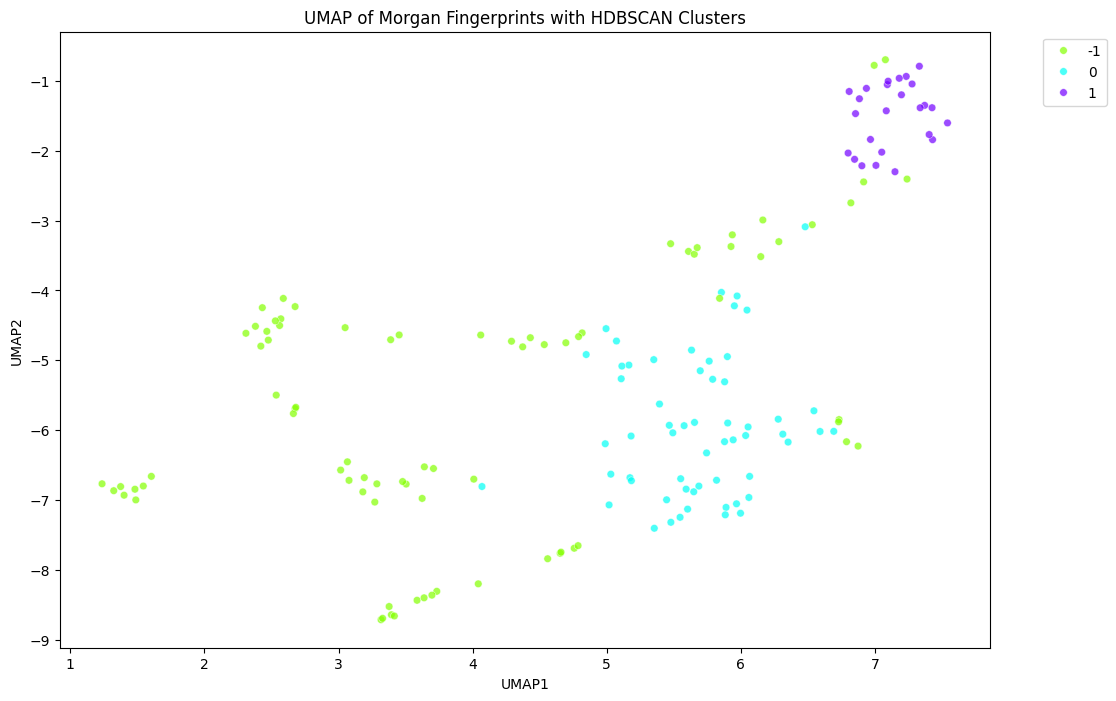

Number of outlier molecules: 82
                                           cleanedMol  \
2               Cn1c(SCc2ccc(Cl)cc2)nnc1-c1cncc(Br)c1   
7                           CCCCCCC#Cc1cncc(C(=O)O)c1   
14  CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc([N+](=O)[O-])cc...   
15  CCCCCCC#Cc1cncc(-c2nnc(SCCCn3ccc(=O)[nH]c3=O)n...   
17  CCCCCCC#Cc1cncc(-c2nnc(SC[C@H]3O[C@@H](n4ccc(=...   

                                             Scaffold  
2                   c1ccc(CSc2nnc(-c3cccnc3)[nH]2)cc1  
7                                            c1ccncc1  
14                  c1ccc(CSc2nnc(-c3cccnc3)[nH]2)cc1  
15       O=c1ccn(CCCSc2nnc(-c3cccnc3)[nH]2)c(=O)[nH]1  
17  O=c1ccn([C@@H]2O[C@H](CSc3nnc(-c4cccnc4)[nH]3)...  
Cluster 0: 58 molecules
Cluster 1: 25 molecules


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
import umap.umap_ as umap
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 0. Check column exists
# -----------------------------
if 'cleanedMol' not in numeric_df.columns:
    raise ValueError("Column 'cleanedMol' not found in numeric_df")

# -----------------------------
# 1. Convert SMILES → Molecule safely
# -----------------------------
def safe_mol_from_smiles(smi):
    if isinstance(smi, str) and smi.strip():  # must be non-empty string
        mol = Chem.MolFromSmiles(smi)
        return mol
    return None

numeric_df['Molecule'] = numeric_df['cleanedMol'].apply(safe_mol_from_smiles)
numeric_df = numeric_df[numeric_df['Molecule'].notna()].reset_index(drop=True)
print(f"Valid molecules: {len(numeric_df)}")

# -----------------------------
# 2. Morgan Fingerprints (2048 bits, radius=2)
# -----------------------------
def calc_fp(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
    return np.array(fp, dtype=int)

numeric_df['Fingerprint'] = numeric_df['Molecule'].apply(calc_fp)
fingerprints = np.stack(numeric_df['Fingerprint'].values)

# -----------------------------
# 3. UMAP (2D)
# -----------------------------
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=30,
    min_dist=0.1,
    metric='jaccard',  # binary fingerprints
    random_state=42
)
umap_result = umap_model.fit_transform(fingerprints)
numeric_df['UMAP1'] = umap_result[:, 0]
numeric_df['UMAP2'] = umap_result[:, 1]

# -----------------------------
# 4. HDBSCAN tuning
# -----------------------------
best_clusters = None
best_score = -1
best_min_size = None
results = []

for min_size in [10, 20, 30, 50, 75, 100]:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size, metric='euclidean')
    labels = clusterer.fit_predict(umap_result)

    # skip if no clusters
    if len(set(labels)) <= 1 or set(labels) == {-1}:
        continue

    mask = labels != -1
    if sum(mask) < 2:
        continue

    score = silhouette_score(umap_result[mask], labels[mask])
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    results.append((min_size, n_clusters, score))

    if score > best_score:
        best_score = score
        best_clusters = labels
        best_min_size = min_size

numeric_df['Cluster'] = best_clusters
print(f"Best HDBSCAN min_cluster_size: {best_min_size}, silhouette: {best_score:.3f}")

# Optional: show all tuning results
results_df = pd.DataFrame(results, columns=['min_size','n_clusters','silhouette_score'])
print(results_df.sort_values('silhouette_score', ascending=False))

# -----------------------------
# 5. Scaffold extraction
# -----------------------------
def get_scaffold_safe(mol):
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold)
    except:
        return None

numeric_df['Scaffold'] = numeric_df['Molecule'].apply(get_scaffold_safe)

# -----------------------------
# 6. Visualization
# -----------------------------
plt.figure(figsize=(12, 8))
unique_clusters = sorted(set(best_clusters))
palette = sns.color_palette("hsv", len(unique_clusters))

sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='Cluster',
    data=numeric_df,
    palette=palette,
    s=30,
    alpha=0.7,
    legend='full'
)
plt.title("UMAP of Morgan Fingerprints with HDBSCAN Clusters")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# -----------------------------
# 7. Outliers
# -----------------------------
outliers = numeric_df[numeric_df['Cluster'] == -1]
print(f"Number of outlier molecules: {len(outliers)}")
print(outliers[['cleanedMol', 'Scaffold']].head())

# -----------------------------
# 8. Cluster summary
# -----------------------------
for cluster_id in unique_clusters:
    if cluster_id == -1:
        continue
    cluster_size = sum(best_clusters == cluster_id)
    print(f"Cluster {cluster_id}: {cluster_size} molecules")


In [ ]:
numeric_df['transformed_IC50'] = np.log10(numeric_df['IC50 uM'] + 1e-8)

## 🔬 Scaffold-Based Data Splitting (Prevents Leakage!)

**⚠️ CRITICAL CHANGE:** Using scaffold-based splitting instead of random splitting

**Why this matters for ChEBERTa embeddings:**
- Random splitting → Similar molecules in train AND test → **Data leakage!**
- Scaffold splitting → Entire scaffolds in train OR test → **No leakage!**
- Embeddings generated AFTER splitting → **No information leakage!**

**What we're doing:**
1. Scaffold-based split first
2. Generate ChEBERTa embeddings per split (train/val/test separately)
3. Verify zero scaffold overlap
4. Analyze train-test similarity
5. Remove near-duplicates

In [ ]:
# Initialize scaffold splitter
splitter = ScaffoldSplitter(smiles_col='Canonical SMILES')

# Perform scaffold-based split
train_idx, val_idx, test_idx = splitter.scaffold_split(
    numeric_df,
    test_size=0.2,
    val_size=0.1,
    random_state=42
)

# Remove near-duplicates
print("\n🔍 Checking for near-duplicates...")
train_idx, test_idx = processor.remove_near_duplicates(
    numeric_df, train_idx, test_idx, threshold=0.95
)

# Analyze similarity
print("\n📊 Analyzing Train-Test Similarity...")
similarity_stats = processor.analyze_similarity(numeric_df, train_idx, test_idx)
plot_similarity_distribution(similarity_stats, save_path='model2_similarity.png')

# Create split dataframes
train_df_clean = numeric_df.iloc[train_idx].reset_index(drop=True)
val_df_clean = numeric_df.iloc[val_idx].reset_index(drop=True)
test_df_clean = numeric_df.iloc[test_idx].reset_index(drop=True)

# Verification
print("\n" + "="*70)
print("🔍 VERIFICATION: Checking for Data Leakage")
print("="*70)

train_smiles = set(train_df_clean['Canonical SMILES'])
val_smiles = set(val_df_clean['Canonical SMILES'])
test_smiles = set(test_df_clean['Canonical SMILES'])

overlap_train_test = train_smiles & test_smiles
overlap_train_val = train_smiles & val_smiles
overlap_val_test = val_smiles & test_smiles

print(f"\n1. SMILES Overlap: {len(overlap_train_test) + len(overlap_train_val) + len(overlap_val_test)} total")
print(f"   {'✅ PASS' if not any([overlap_train_test, overlap_train_val, overlap_val_test]) else '❌ FAIL'}")

if not any([overlap_train_test, overlap_train_val, overlap_val_test]):
    print("\n🎉 ALL CHECKS PASSED - No data leakage detected!")
    print(f"\n   Train: {len(train_df_clean)} | Val: {len(val_df_clean)} | Test: {len(test_df_clean)}")
else:
    print("\n⚠️  WARNING: DATA LEAKAGE DETECTED!")
print("="*70)

# Prepare for ChEBERTa embedding generation
print("\n⚠️  IMPORTANT: Generate ChEBERTa embeddings SEPARATELY for each split")
print("   DO NOT generate embeddings for the entire dataset before splitting!")

In [ ]:
# Import validation utilities
from qsar_validation_utils import (
    DatasetBiasAnalyzer, ActivityCliffDetector, ModelComplexityAnalyzer,
    PerformanceMetricsCalculator, YRandomizationTester, AssayNoiseEstimator,
    print_comprehensive_validation_checklist
)

# Run comprehensive validation
analyzer = DatasetBiasAnalyzer(smiles_col='Canonical SMILES', target_col='IC50 uM')

# 1. Scaffold diversity
diversity_results = analyzer.analyze_scaffold_diversity(df)
activity_stats = analyzer.analyze_activity_distribution(df)

# Report per split
analyzer.report_split_diversity(
    diversity_results['df_with_scaffolds'], train_idx, val_idx, test_idx
)

# 2. Model complexity (ChEBERTa embeddings = 768 dimensions)
print("\n" + "=" * 80)
print("MODEL COMPLEXITY ANALYSIS (ChEBERTa)")
print("=" * 80)
ModelComplexityAnalyzer.analyze_complexity(
    n_samples=len(df2), n_features=768, model_type='linear'
)

# 3. Activity cliffs
cliff_detector = ActivityCliffDetector(smiles_col='Canonical SMILES', target_col='IC50 uM')
cliff_df = cliff_detector.detect_activity_cliffs(df2, similarity_threshold=0.85, activity_threshold=2.0)

# 4. Assay noise
noise_estimator = AssayNoiseEstimator()
error_estimate = noise_estimator.estimate_experimental_error(df, 'IC50 uM')

print("\n" + "=" * 80)
print("✓ COMPREHENSIVE VALIDATION COMPLETE")
print("=" * 80)
print(f"\n📌 KEY METRICS TO TRACK:")
print(f"   • Scaffold diversity: {diversity_results['diversity_ratio']:.3f}")
print(f"   • Samples:Features ratio: {len(df2)/768:.2f}:1")
print(f"   • Activity cliffs: {len(cliff_df)} pairs detected")
print(f"   • Expected assay RMSE: ~{error_estimate['experimental_error']:.1f} log units")
print(f"\n   ⚠️ Model RMSE should be compared to assay precision!")

## 📊 COMPREHENSIVE VALIDATION ANALYSIS

**Critical validation checks for low-data QSAR:**

1. Dataset bias & scaffold diversity
2. Model complexity (samples vs features)
3. Activity cliffs & SAR discontinuities  
4. Assay measurement noise (~0.5 log units)
5. Target distribution & range
6. Baseline performance comparison
7. Y-randomization overfitting test

📌 **ChEBERTa-specific note**: Pre-trained embeddings reduce overfitting risk, but validation still critical!

## Baseline-Model

### Rdkit

In [ ]:
df=numeric_df

In [ ]:
# Importing pandas as pd
import pandas as pd

# Import RDKit modules
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# Function to calculate circular (Morgan) fingerprint
def calculate_circular_fingerprint(smiles, radius=2, nBits=1024):
    # Convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)

    if mol is None:
        # Return NaNs if molecule is invalid
        return np.full(nBits, np.nan)

    # Calculate Morgan fingerprint as a bit vector
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)

    # Convert to numpy array
    arr = np.zeros((nBits,), dtype=int)
    AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply to your DataFrame
fingerprint_array = np.array(df['cleanedMol'].apply(lambda x: calculate_circular_fingerprint(x, radius=2, nBits=1024)).tolist())

# Convert array to DataFrame
fp_df = pd.DataFrame(fingerprint_array, columns=[f'FP_{i}' for i in range(fingerprint_array.shape[1])])

# Merge with original DataFrame
df = pd.concat([df.reset_index(drop=True), fp_df.reset_index(drop=True)], axis=1)


[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerator
[04:16:04] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
df

,Identifier,Canonical SMILES,IC50 uM,PIC50,valid_smiles,cleanedMol,Molecule,Fingerprint,UMAP1,UMAP2,...,FP_1014,FP_1015,FP_1016,FP_1017,FP_1018,FP_1019,FP_1020,FP_1021,FP_1022,FP_1023
0,TB-VS0012,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=...,5.300,5.275724,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e26b0a50>,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.901679,-5.896371,...,0,0,0,0,0,0,0,0,0,0
1,TB-VS12-2,BrC1=CC(C2=NN=C(N2C)S)=CN=C1,200.000,3.698970,True,Cn1c(-c2cncc(Br)c2)n[nH]c1=S,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d1700>,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.172891,-6.678698,...,0,0,0,0,0,0,0,0,0,0
2,TB-VS12-3,BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1,200.000,3.698970,True,Cn1c(SCc2ccc(Cl)cc2)nnc1-c1cncc(Br)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d1770>,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.731848,-5.847458,...,0,0,0,0,0,0,0,0,0,0
3,TB-VS12-4,CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1,22.570,4.646468,True,CCCCCCC#Cc1cncc(-c2n[nH]c(=S)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d2570>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.030171,-6.628533,...,0,0,0,0,0,0,0,0,0,0
4,TB-VS12-5,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=CC=C3)N2C)=CN=C1,175.000,3.756962,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccccc3)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d2d50>,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.446123,-6.995073,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,ROY-0000175-001,CC(OC(N(C1)CC21CCN(C3=CC(C#CC4=CC=CC=C4)=CN=C3...,6.843,5.164753,True,CC(C)(C)OC(=O)N1CC2(CCN(c3cncc(C#Cc4ccccc4)c3)...,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef290>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5.936086,-3.203421,...,0,0,0,0,0,0,0,0,0,0
161,ROY-0000223-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,5.615,5.250650,True,FC(F)(F)Oc1ccc(C#Cc2cncc(N3CC[C@@H](OCc4ccc(Cl...,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef300>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.951382,-4.219354,...,0,0,0,0,1,1,0,0,0,0
162,ROY-0000222-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,9.705,5.013004,True,Clc1ccc(CO[C@@H]2CCN(c3cncc(C#Cc4ccccc4)c3)C2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef370>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.045620,-4.280353,...,0,0,0,0,1,1,0,0,0,0
163,ROY-0000225-001,CC(OC(N1CC(OCCCC2=CC=CC=C2)C1)=O)(C)C,148.000,3.829738,True,CC(C)(C)OC(=O)N1CC(OCCCc2ccccc2)C1,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef3e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",6.163700,-2.991008,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
feature1=df.iloc[:, 16:]

In [ ]:
df

,Identifier,Canonical SMILES,IC50 uM,PIC50,valid_smiles,cleanedMol,Molecule,Fingerprint,UMAP1,UMAP2,...,FP_1014,FP_1015,FP_1016,FP_1017,FP_1018,FP_1019,FP_1020,FP_1021,FP_1022,FP_1023
0,TB-VS0012,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=...,5.300,5.275724,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e26b0a50>,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.901679,-5.896371,...,0,0,0,0,0,0,0,0,0,0
1,TB-VS12-2,BrC1=CC(C2=NN=C(N2C)S)=CN=C1,200.000,3.698970,True,Cn1c(-c2cncc(Br)c2)n[nH]c1=S,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d1700>,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.172891,-6.678698,...,0,0,0,0,0,0,0,0,0,0
2,TB-VS12-3,BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1,200.000,3.698970,True,Cn1c(SCc2ccc(Cl)cc2)nnc1-c1cncc(Br)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d1770>,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.731848,-5.847458,...,0,0,0,0,0,0,0,0,0,0
3,TB-VS12-4,CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1,22.570,4.646468,True,CCCCCCC#Cc1cncc(-c2n[nH]c(=S)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d2570>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.030171,-6.628533,...,0,0,0,0,0,0,0,0,0,0
4,TB-VS12-5,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=CC=C3)N2C)=CN=C1,175.000,3.756962,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccccc3)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d2d50>,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.446123,-6.995073,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,ROY-0000175-001,CC(OC(N(C1)CC21CCN(C3=CC(C#CC4=CC=CC=C4)=CN=C3...,6.843,5.164753,True,CC(C)(C)OC(=O)N1CC2(CCN(c3cncc(C#Cc4ccccc4)c3)...,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef290>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5.936086,-3.203421,...,0,0,0,0,0,0,0,0,0,0
161,ROY-0000223-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,5.615,5.250650,True,FC(F)(F)Oc1ccc(C#Cc2cncc(N3CC[C@@H](OCc4ccc(Cl...,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef300>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.951382,-4.219354,...,0,0,0,0,1,1,0,0,0,0
162,ROY-0000222-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,9.705,5.013004,True,Clc1ccc(CO[C@@H]2CCN(c3cncc(C#Cc4ccccc4)c3)C2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef370>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.045620,-4.280353,...,0,0,0,0,1,1,0,0,0,0
163,ROY-0000225-001,CC(OC(N1CC(OCCCC2=CC=CC=C2)C1)=O)(C)C,148.000,3.829738,True,CC(C)(C)OC(=O)N1CC(OCCCc2ccccc2)C1,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef3e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",6.163700,-2.991008,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
target=df['transformed_IC50']
target.head()

,transformed_IC50
0,0.724276
1,2.301030
2,2.301030
3,1.353532
4,2.243038


In [ ]:
!pip install --pre deepchem
import deepchem
deepchem.__version__

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


'2.5.0'

In [ ]:
numeric_df

,Identifier,Canonical SMILES,IC50 uM,PIC50,valid_smiles,cleanedMol,Molecule,Fingerprint,UMAP1,UMAP2,Cluster,Scaffold,transformed_IC50
0,TB-VS0012,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=C(Cl)C=C3)N2C)=...,5.300,5.275724,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e26b0a50>,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.901679,-5.896371,0,c1ccc(CSc2nnc(-c3cccnc3)[nH]2)cc1,0.724276
1,TB-VS12-2,BrC1=CC(C2=NN=C(N2C)S)=CN=C1,200.000,3.698970,True,Cn1c(-c2cncc(Br)c2)n[nH]c1=S,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d1700>,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.172891,-6.678698,0,S=c1[nH]nc(-c2cccnc2)[nH]1,2.301030
2,TB-VS12-3,BrC1=CC(C2=NN=C(N2C)SCC3=CC=C(C=C3)Cl)=CN=C1,200.000,3.698970,True,Cn1c(SCc2ccc(Cl)cc2)nnc1-c1cncc(Br)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d1770>,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.731848,-5.847458,-1,c1ccc(CSc2nnc(-c3cccnc3)[nH]2)cc1,2.301030
3,TB-VS12-4,CCCCCCC#CC1=CC(C2=NN=C(N2C)S)=CN=C1,22.570,4.646468,True,CCCCCCC#Cc1cncc(-c2n[nH]c(=S)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d2570>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.030171,-6.628533,0,S=c1[nH]nc(-c2cccnc2)[nH]1,1.353532
4,TB-VS12-5,CCCCCCC#CC1=CC(C2=NN=C(SCC3=CC=CC=C3)N2C)=CN=C1,175.000,3.756962,True,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccccc3)n2C)c1,<rdkit.Chem.rdchem.Mol object at 0x7a32e24d2d50>,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.446123,-6.995073,0,c1ccc(CSc2nnc(-c3cccnc3)[nH]2)cc1,2.243038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,ROY-0000175-001,CC(OC(N(C1)CC21CCN(C3=CC(C#CC4=CC=CC=C4)=CN=C3...,6.843,5.164753,True,CC(C)(C)OC(=O)N1CC2(CCN(c3cncc(C#Cc4ccccc4)c3)...,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef290>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5.936086,-3.203421,-1,C(#Cc1cncc(N2CCC3(CNC3)C2)c1)c1ccccc1,0.835247
161,ROY-0000223-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,5.615,5.250650,True,FC(F)(F)Oc1ccc(C#Cc2cncc(N3CC[C@@H](OCc4ccc(Cl...,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef300>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.951382,-4.219354,0,C(#Cc1cncc(N2CC[C@@H](OCc3ccccc3)C2)c1)c1ccccc1,0.749350
162,ROY-0000222-001,ClC(C=C1)=CC=C1CO[C@H](CC2)CN2C3=CC(C#CC4=CC=C...,9.705,5.013004,True,Clc1ccc(CO[C@@H]2CCN(c3cncc(C#Cc4ccccc4)c3)C2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef370>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.045620,-4.280353,0,C(#Cc1cncc(N2CC[C@@H](OCc3ccccc3)C2)c1)c1ccccc1,0.986996
163,ROY-0000225-001,CC(OC(N1CC(OCCCC2=CC=CC=C2)C1)=O)(C)C,148.000,3.829738,True,CC(C)(C)OC(=O)N1CC(OCCCc2ccccc2)C1,<rdkit.Chem.rdchem.Mol object at 0x7a32e21ef3e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",6.163700,-2.991008,-1,c1ccc(CCCOC2CNC2)cc1,2.170262


In [ ]:
df_selected = numeric_df[['cleanedMol', 'transformed_IC50']]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

In [ ]:
df_selected.to_csv('inhibitor.csv', index=False)

In [ ]:
import deepchem as dc

In [ ]:
dataset_file = 'inhibitor.csv'
task = ['transformed_IC50']
featurizer_func = dc.feat.ConvMolFeaturizer()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

Streaming output truncated to the last 5000 lines.
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[04:46:21] DEPRECATION WARNING: please use GetValence(getExplicit=False)


In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
from rdkit import Chem

In [ ]:
!pip install transformers

In [ ]:
pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.8/330.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.0 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=49c97c90ed13946d4d1b99f0daacdaec741302cc2f3098c87de40f0cd6bc9ae0
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [ ]:
from simpletransformers.classification import ClassificationModel
import logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

from simpletransformers.classification import ClassificationModel, ClassificationArgs

model = ClassificationModel('roberta', 'DeepChem/ChemBERTa-77M-MTR', args={'evaluate_each_epoch': True, 'evaluate_during_training_verbose': True, 'no_save': True, 'num_train_epochs': 10, 'auto_weights': True}) # You can set class weights by using the optional weight argument

In [ ]:
import deepchem as dc
import pandas as pd


# Define the task(s) you want to predict
task = ['classLabel']

# Create a DeepChem dataset from your Pandas DataFrame
dataset = dc.data.NumpyDataset(X=df_selected['cleanedMol'], y=df_selected['transformed_IC50'])

# Define the split fractions (e.g., 80% train, 10% validation, 10% test)
splitter = dc.splits.RandomSplitter()
frac_train = 0.7
frac_valid = 0.15
frac_test = 0.15

# Split the dataset
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset, frac_train=frac_train, frac_valid=frac_valid, frac_test=frac_test
)



In [ ]:
test_dataset

<NumpyDataset X.shape: (25,), y.shape: (25,), w.shape: (25,), ids: [88 21 57 ... 14 92 102], task_names: [0]>

In [ ]:
train_df = train_dataset.to_dataframe()
valid_df = valid_dataset.to_dataframe()
test_df = test_dataset.to_dataframe()

In [ ]:
train_df

,X,y,w,ids
0,CCCCCCC#Cc1cncc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1,0.724276,1.0,135
1,NC(CSCc1ccc(Cl)cc1)C(=O)Nc1cccc2ccccc12,1.466274,1.0,115
2,CCCCCCCCCOc1ccc(NC(=O)C(CSCc2ccc(Cl)cc2)NC(=O)...,2.000000,1.0,131
3,CCCCCCC#Cc1cncc(-c2nnc(SCc3cc(C(F)(F)F)cc(C(F)...,2.301030,1.0,55
4,CCCCCCC#Cc1cncc(-c2nnc(SC[C@H]3O[C@@H](n4ccc(=...,2.292920,1.0,95
...,...,...,...,...
110,CCCC#Cc1cncc(C(=O)NN)c1,2.301030,1.0,46
111,CCCCCCC#Cc1cncc(C(=O)O)c1,2.049218,1.0,7
112,CCCCCCC#Cc1cccc(-c2nnc(SCc3ccc(Cl)cc3)n2C)c1,0.927883,1.0,43
113,CCCCCCC#Cc1cncc(-c2nnc(Sc3ccc(Cl)cc3)n2C)c1,1.123525,1.0,70


In [ ]:
train_df=train_df[['X','y']]
valid_df=valid_df[['X','y']]
test_df=test_df[['X','y']]

In [ ]:
import deepchem as dc
import pandas as pd
from rdkit import Chem
from deepchem.feat import MolGraphConvFeaturizer

# Example: Assume df_selected has "SMILES" and "IC50" columns
smiles = df_selected["cleanedMol"].values
labels = df_selected["transformed_IC50"].values  # should be log-transformed if needed

# Choose a featurizer (here: GraphConv for ChemBERTa-style models, or use fingerprints)
featurizer = MolGraphConvFeaturizer()
features = featurizer.featurize(smiles)

# Build DeepChem dataset
dataset = dc.data.NumpyDataset(X=features, y=labels)

# Split (70/15/15)
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset, frac_train=0.7, frac_valid=0.15, frac_test=0.15
)


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
# ===============================
# ChemBERTa Regression + Optuna
# ===============================

import deepchem as dc
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from transformers import AutoTokenizer, RobertaModel
import optuna

# ---------- CONFIG ----------
CSV_PATH = "inhibitor.csv"
SMILES_COL = "cleanedMol"
TARGET_COL = "transformed_IC50"
CHEMBERTA_MODEL_NAME = "DeepChem/ChemBERTa-5M-MTR"
MAX_LEN = 256
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Fractions for splitting
frac_train = 0.7
frac_valid = 0.15
frac_test = 0.15
# ----------------------------

# ---------- Load dataset ----------
df = pd.read_csv(CSV_PATH)[[SMILES_COL, TARGET_COL]].dropna().reset_index(drop=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

n_total = len(df)
n_train = int(frac_train * n_total)
n_valid = int(frac_valid * n_total)
n_test = n_total - n_train - n_valid

train_df = df.iloc[:n_train]
valid_df = df.iloc[n_train:n_train+n_valid]
test_df = df.iloc[n_train+n_valid:]

# ---------- Load ChemBERTa ----------
tokenizer = AutoTokenizer.from_pretrained(CHEMBERTA_MODEL_NAME)
bert_model = RobertaModel.from_pretrained(CHEMBERTA_MODEL_NAME).to(DEVICE)
bert_model.eval()  # freeze weights

# ---------- Convert SMILES to CLS embeddings ----------
def smiles_to_embedding(smiles_list):
    embeddings = []
    with torch.no_grad():
        for smi in smiles_list:
            smi = str(smi)
            inputs = tokenizer(
                smi,
                return_tensors="pt",
                truncation=True,
                padding="max_length",
                max_length=MAX_LEN
            ).to(DEVICE)
            outputs = bert_model(**inputs)
            cls_emb = outputs.last_hidden_state[:,0,:].cpu().numpy()
            embeddings.append(cls_emb.flatten())
    return np.array(embeddings)

X_train = smiles_to_embedding(train_df[SMILES_COL].tolist())
y_train = train_df[TARGET_COL].astype(float).to_numpy()

X_val = smiles_to_embedding(valid_df[SMILES_COL].tolist())
y_val = valid_df[TARGET_COL].astype(float).to_numpy()

X_test = smiles_to_embedding(test_df[SMILES_COL].tolist())
y_test = test_df[TARGET_COL].astype(float).to_numpy()

train_dataset = dc.data.NumpyDataset(X_train, y_train)
val_dataset = dc.data.NumpyDataset(X_val, y_val)

# ---------- Objective function ----------
def objective(trial):
    # Hyperparameter search space
    hidden1 = trial.suggest_int("hidden1", 128, 1024)
    hidden2 = trial.suggest_int("hidden2", 64, 512)
    dropout = trial.suggest_float("dropout", 0.0, 0.5)
    lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 32])

    n_features = X_train.shape[1]
    torch_model = nn.Sequential(
        nn.Linear(n_features, hidden1),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden1, hidden2),
        nn.ReLU(),
        nn.Linear(hidden2, 1)
    )

    optimizer = dc.models.optimizers.Adam(learning_rate=lr)

    model = dc.models.TorchModel(
        model=torch_model,
        loss=dc.models.losses.L2Loss(),
        optimizer=optimizer,
        batch_size=batch_size,
        model_dir= "/content/sample_data"  # avoid saving multiple models
    )

    model.fit(train_dataset, nb_epoch=20, deterministic=True)

    # Validation RMSE
    y_val_pred = model.predict(val_dataset).flatten()
    rmse = np.sqrt(np.mean((y_val - y_val_pred) ** 2))
    return rmse

# ---------- Run Optuna study ----------
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value:.4f}")
print(f"  Params: {trial.params}")

# ---------- Train final model with best params ----------
best_params = trial.params
n_features = X_train.shape[1]
torch_model = nn.Sequential(
    nn.Linear(n_features, best_params["hidden1"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden1"], best_params["hidden2"]),
    nn.ReLU(),
    nn.Linear(best_params["hidden2"], 1)
)
optimizer = dc.models.optimizers.Adam(learning_rate=best_params["lr"])
final_model = dc.models.TorchModel(
    model=torch_model,
    loss=dc.models.losses.L2Loss(),
    optimizer=optimizer,
    batch_size=best_params["batch_size"],
    model_dir="chemberta_regression_final"
)

# Combine train + valid for final training
X_full = np.vstack([X_train, X_val])
y_full = np.concatenate([y_train, y_val])
train_dataset_full = dc.data.NumpyDataset(X_full, y_full)
final_model.fit(train_dataset_full, nb_epoch=30)

# ---------- Evaluation ----------
test_dataset = dc.data.NumpyDataset(X_test, y_test)
y_pred = final_model.predict(test_dataset).flatten()
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"Test RMSE: {rmse:.4f}")


tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-5M-MTR and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

[I 2025-12-04 05:00:31,108] A new study created in memory with name: no-name-e39de6ce-bd36-4d48-af94-40b0b5f59871
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[I 2025-12-04 05:00:32,837] Trial 0 finished with value: 0.6503872360725216 and parameters: {'hidden1': 686, 'hidden2': 338, 'dropout': 0.40611212809662195, 'lr': 0.0004621551536948179, 'batch_size': 8}. Best is trial 0 with value: 0.6503872360725216.
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  retur

Best trial:
  RMSE: 0.6468
  Params: {'hidden1': 830, 'hidden2': 65, 'dropout': 0.035944073828649475, 'lr': 0.0009025009892930408, 'batch_size': 8}
Test RMSE: 0.7870


In [ ]:
import torch
import json

# Save PyTorch weights
torch.save(final_model.model.state_dict(), "chemberta_regression_final.pt")

# Save best hyperparameters too
with open("chemberta_best_params.json", "w") as f:
    json.dump(best_params, f, indent=2)

print("✅ Model weights and parameters saved!")


✅ Model weights and parameters saved!


In [ ]:
import torch
import torch.nn as nn
import json

# Load best params
with open("chemberta_best_params.json", "r") as f:
    best_params = json.load(f)

n_features = X_train.shape[1]  # must match training features

# Rebuild architecture
torch_model = nn.Sequential(
    nn.Linear(n_features, best_params["hidden1"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden1"], best_params["hidden2"]),
    nn.ReLU(),
    nn.Linear(best_params["hidden2"], 1)
)

# Load trained weights
torch_model.load_state_dict(torch.load("chemberta_regression_final.pt", map_location=DEVICE))
torch_model.to(DEVICE)
torch_model.eval()


Sequential(
  (0): Linear(in_features=384, out_features=455, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.14032174191981137, inplace=False)
  (3): Linear(in_features=455, out_features=395, bias=True)
  (4): ReLU()
  (5): Linear(in_features=395, out_features=1, bias=True)
)

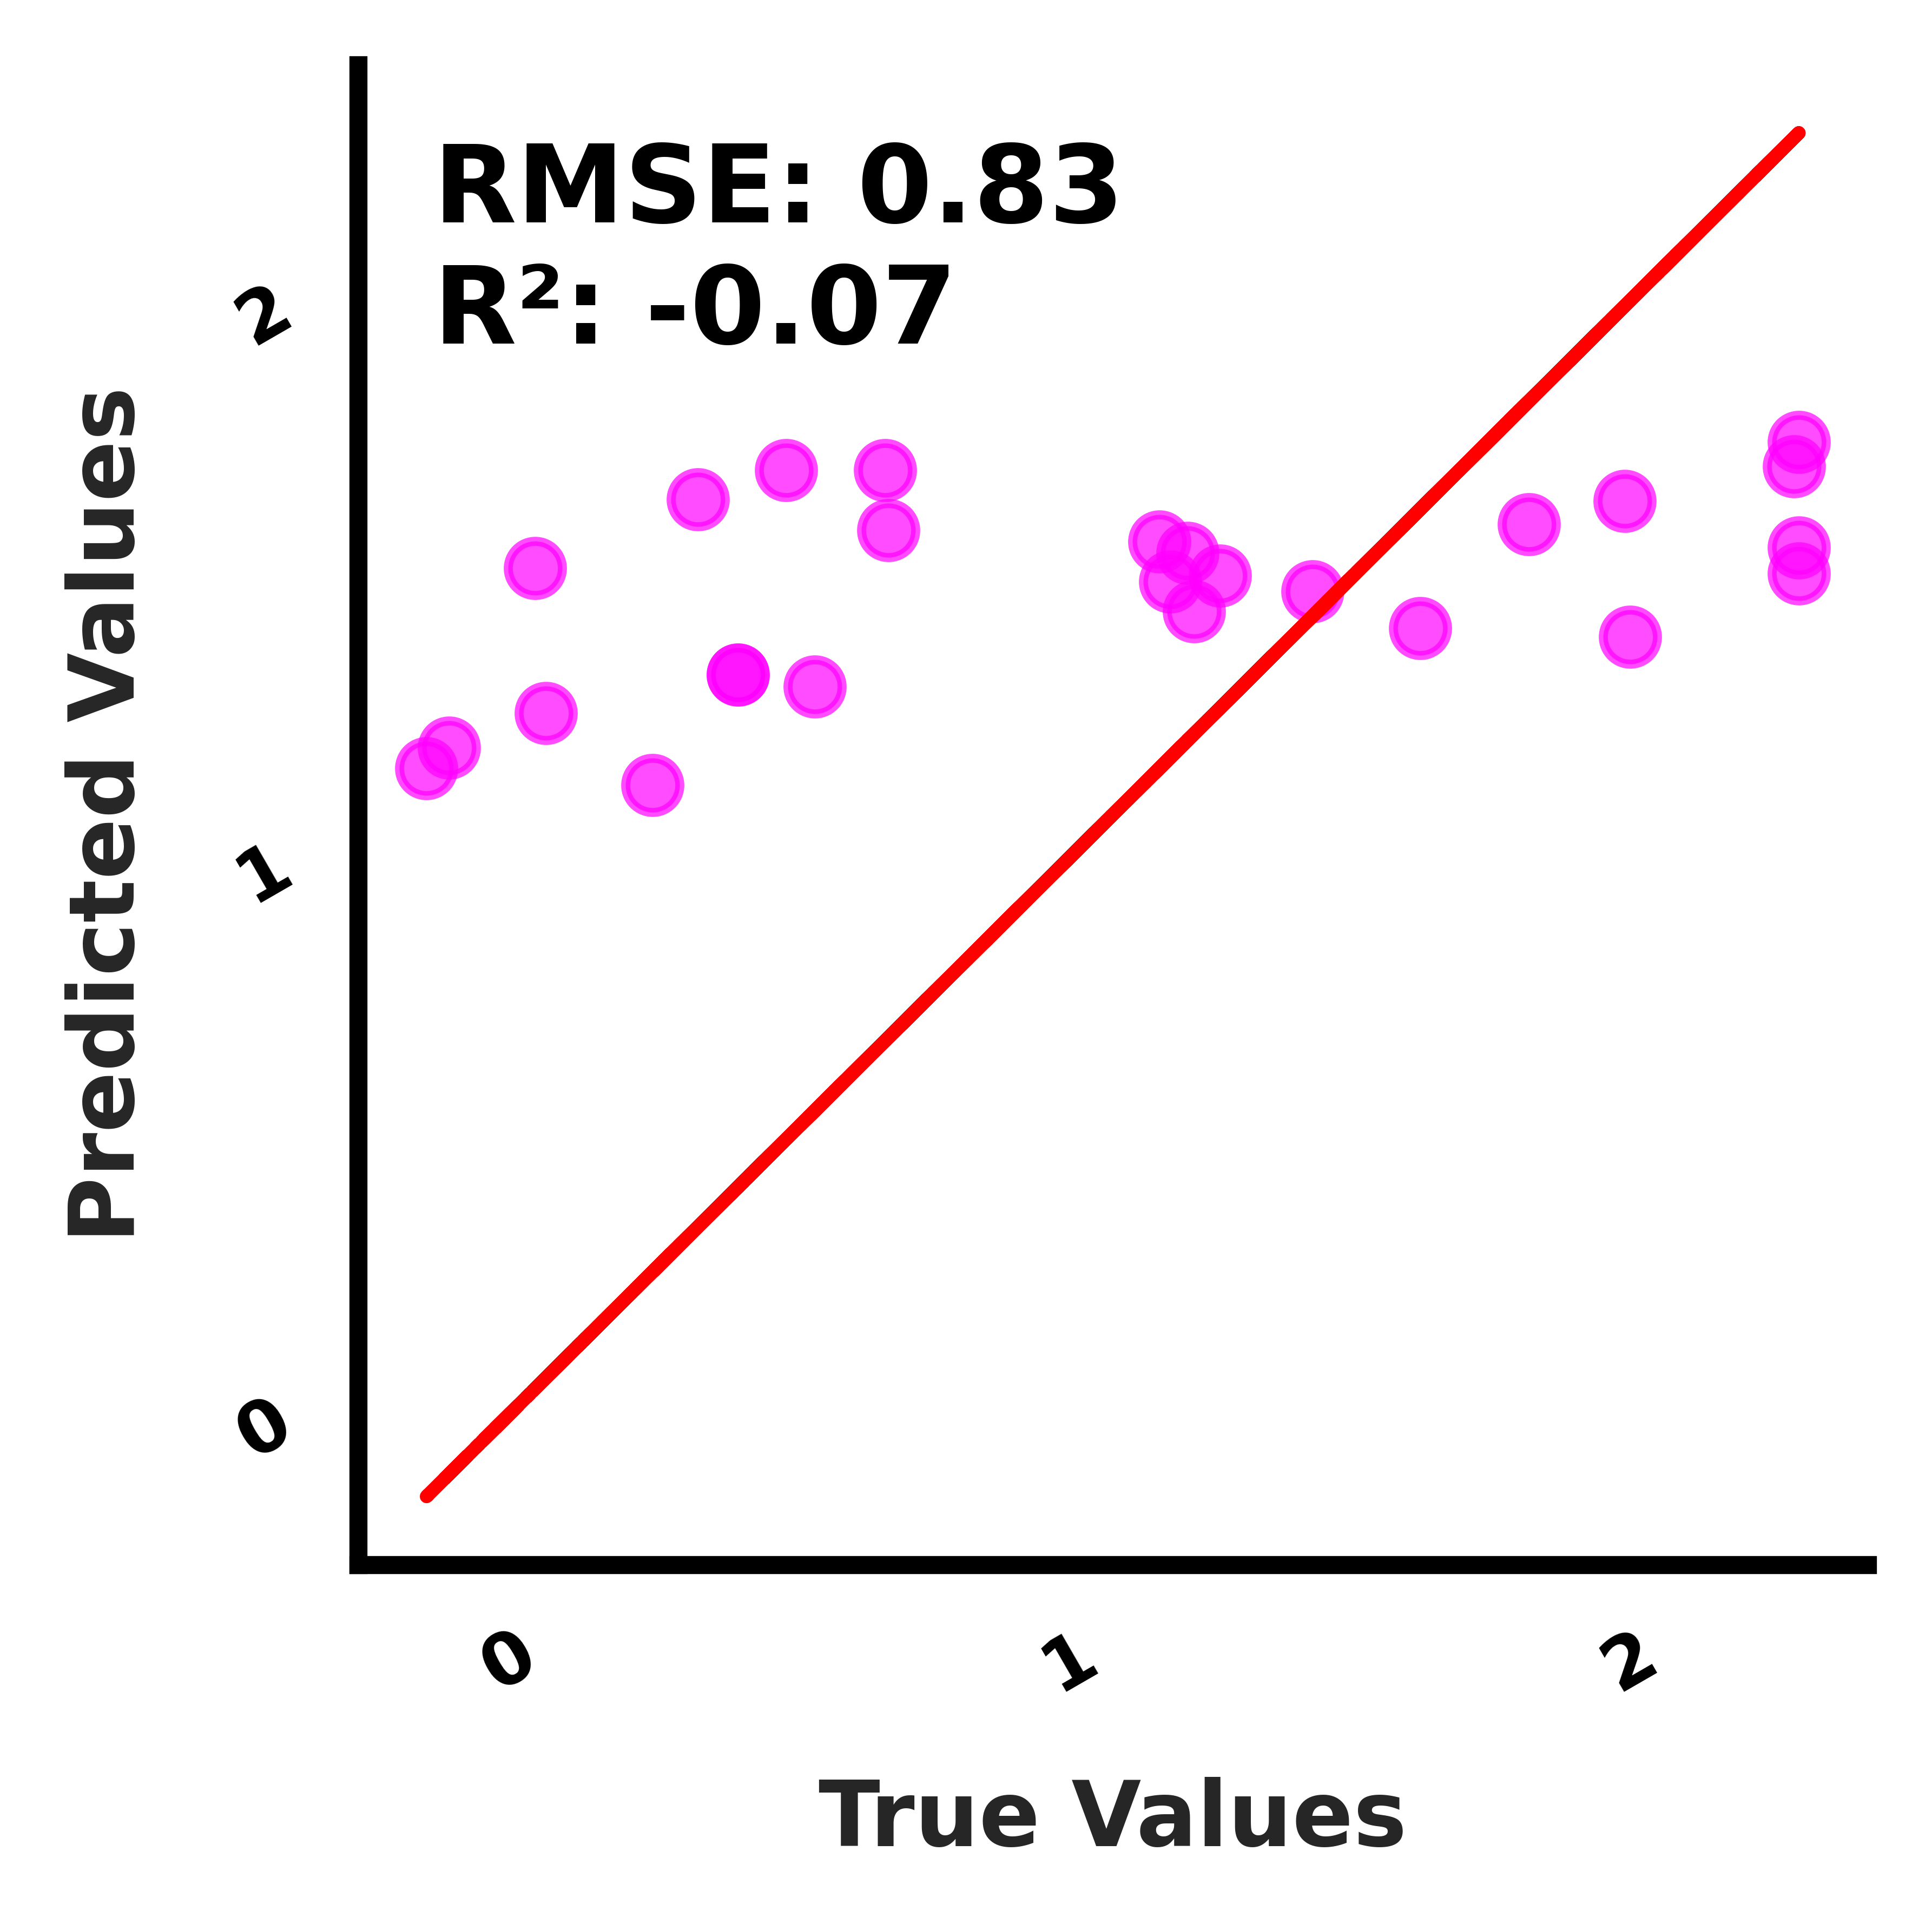

In [ ]:
import deepchem as dc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.ticker import MaxNLocator

# ---------- CMYK to RGB ----------
def cmyk_to_rgb(c, m, y, k):
    r = 1 - min(1, c * (1 - k) + k)
    g = 1 - min(1, m * (1 - k) + k)
    b = 1 - min(1, y * (1 - k) + k)
    return (r, g, b)

pink_rgb = cmyk_to_rgb(0, 1, 0, 0)  # CMYK pink

# ---------- Dataset ----------
# Replace 'final_model' and 'test_dataset' with your actual variables
X_test = test_dataset.X
y_true = test_dataset.y.ravel()
dataset = dc.data.NumpyDataset(X=X_test, y=y_true)

# ---------- Predictions ----------
y_pred = final_model.predict(dataset).flatten()

# ---------- Metrics ----------
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# ---------- Plot ----------
plt.rcParams.update({
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'font.weight': 'bold'
})

plt.figure(figsize=(3, 3), dpi=1200)
plt.scatter(y_true, y_pred, alpha=0.7, color=pink_rgb)
plt.plot(y_true, y_true, color='red', linestyle='--')

plt.xlabel('True Values', fontsize=10, weight='bold', labelpad=8)
plt.ylabel('Predicted Values', fontsize=10, weight='bold', labelpad=8)

ax = plt.gca()

# Keep integer ticks but add spacing so labels don’t overlap
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Increase space between ticks and labels
ax.tick_params(axis="x", pad=6)
ax.tick_params(axis="y", pad=6)

# Slight rotation to prevent overlap
plt.xticks(rotation=30, fontsize=8, weight='bold')
plt.yticks(rotation=30, fontsize=8, weight='bold')

# Customize axes
ax.tick_params(axis='both', which='both', direction='in', length=6, width=2, colors='black')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

# Metrics
plt.text(0.05, 0.95, f'RMSE: {rmse:.2f}\nR²: {r2:.2f}',
         transform=ax.transAxes, fontsize=12,
         verticalalignment='top', color='black', weight='bold')

# Save figure
plt.savefig("test_predicted_vs_true_separated.tiff", format='tiff', dpi=2400, bbox_inches='tight')
plt.show()

# ---------- Save Metrics ----------
pd.DataFrame({'R2 Score': [r2], 'RMSE': [rmse]}, index=['Test']) \
    .to_excel('test_evaluation_metrics.xlsx', index_label='Dataset')
